In [19]:
import datetime
import pandas_datareader.data as web
%matplotlib inline
import matplotlib.pyplot as plt

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.today()
#df = web.DataReader("NIKKEI225", "fred", start, end).reset_index()
ni225 = web.DataReader("NIKKEI225", "fred", start, end)
#ni225modi = ni225.dropna(how='all', axis=[0, 1])
#nikkei225 = ni225modi.as_matrix()
#nikkei225

In [37]:
df = ni225.reset_index()
df = df.dropna()
df['date'] = df['DATE']
df['close'] = df['NIKKEI225']
df['ema_12'] = df['close'].ewm(span=12).mean()
df['ema_26'] = df['close'].ewm(span=26).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['signal'] = df['macd'].ewm(span=9).mean()
df['oscillator'] = df['macd'] - df['signal']
df.head()

,DATE,NIKKEI225,date,close,ema_12,ema_26,macd,signal,oscillator
1,2010-01-04,10654.79,2010-01-04,10654.79,10654.790000,10654.790000,0.000000,0.000000,0.000000
2,2010-01-05,10681.83,2010-01-05,10681.83,10669.436667,10668.830000,0.606667,0.337037,0.269630
3,2010-01-06,10731.45,2010-01-06,10731.45,10693.640485,10691.328758,2.311727,1.146336,1.165391
4,2010-01-07,10681.66,2010-01-07,10681.66,10689.858714,10688.625796,1.232918,1.175666,0.057252
5,2010-01-08,10798.32,2010-01-08,10798.32,10719.327258,10714.064334,5.262924,2.391533,2.871391


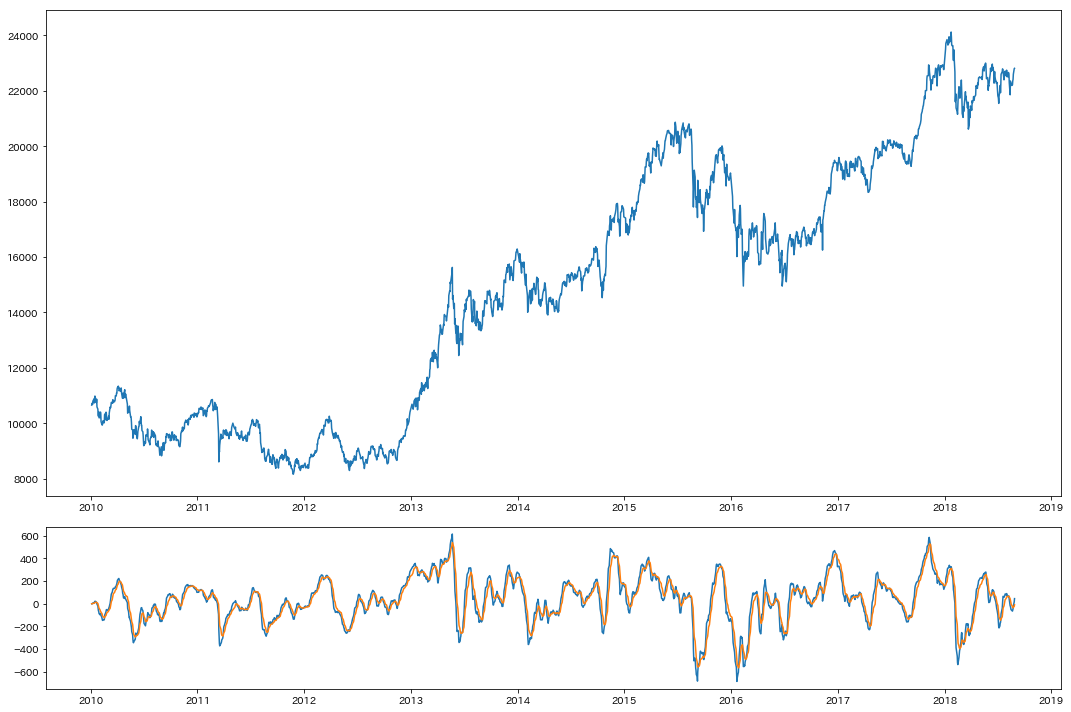

In [39]:
%matplotlib inline
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.plot(df['date'].astype(datetime.datetime), df['close'])
ax2.plot(df['date'].astype(datetime.datetime), df['macd'])
ax2.plot(df['date'].astype(datetime.datetime), df['signal'])
 
fig.tight_layout()
plt.show()
 

- macd = ema_12 - ema_26
- signal = 9days ema of macd
- macd > 0 buy
- macd < 0 sell
- macd > signal buy
- macd < signal sell

In [47]:
df = df[500:]

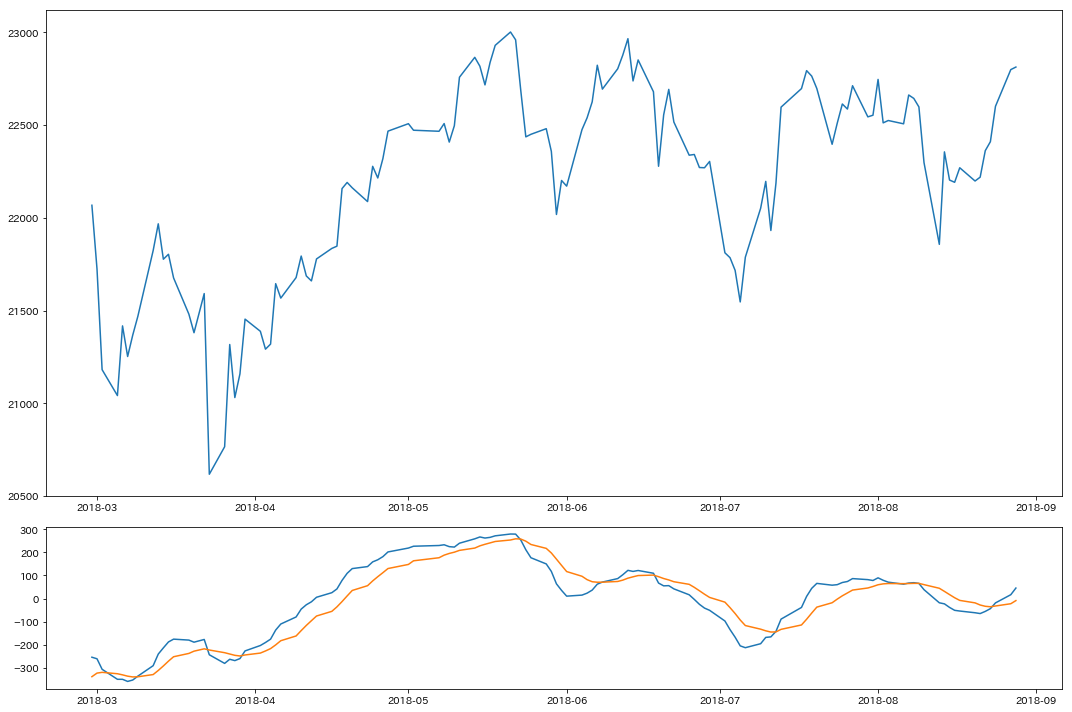

In [48]:
%matplotlib inline
from pylab import rcParams

rcParams['figure.figsize'] = 15,10

fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]})
ax1.plot(df['date'].astype(datetime.datetime), df['close'])
ax2.plot(df['date'].astype(datetime.datetime), df['macd'])
ax2.plot(df['date'].astype(datetime.datetime), df['signal'])
 
fig.tight_layout()
plt.show()

In [49]:
df

,DATE,NIKKEI225,date,close,ema_12,ema_26,macd,signal,oscillator
2128,2018-02-28,22068.24,2018-02-28,22068.24,22046.367544,22301.192956,-254.825412,-339.307512,84.482100
2129,2018-03-01,21724.47,2018-03-01,21724.47,21996.844845,22258.472737,-261.627892,-323.771588,62.143696
2130,2018-03-02,21181.64,2018-03-02,21181.64,21871.428715,22178.707349,-307.278634,-320.472997,13.194363
2131,2018-03-05,21042.09,2018-03-05,21042.09,21743.838143,22094.513472,-350.675328,-326.513464,-24.161865
2132,2018-03-06,21417.76,2018-03-06,21417.76,21693.672275,22044.383585,-350.711310,-331.353033,-19.358277
2133,2018-03-07,21252.72,2018-03-07,21252.72,21625.833464,21985.741838,-359.908374,-337.064101,-22.844273
2134,2018-03-08,21368.07,2018-03-08,21368.07,21586.177546,21939.988368,-353.810822,-340.413445,-13.397377
2135,2018-03-09,21469.20,2018-03-09,21469.20,21568.181001,21905.115156,-336.934155,-339.717587,2.783432
2136,2018-03-12,21824.03,2018-03-12,21824.03,21607.542385,21899.108848,-291.566463,-330.087362,38.520899
2137,2018-03-13,21968.10,2018-03-13,21968.10,21663.012787,21904.219304,-241.206516,-312.311193,71.104677
